In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# **Employee Data Analysis**
This dataset contains detailed information on employees across various departments and countries, capturing key aspects of their employment and performance metrics. It can be used for various HR analytics tasks, such as analyzing salary trends, studying the impact of leaves on productivity, or predicting employee turnover.

https://www.kaggle.com/datasets/abdallahwagih/company-employees




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/StuffAnalytics/employees.xlsx')
df.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


In [ ]:
df.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [ ]:
df.columns = ['sıra','isim','soyisim','cinsiyet', 'ise_başlama_tar','calısma_süresi_yıl','departmanı','ülkesi','bölgesi','aylık_maaş','yıllık_maas','5_üzerinden_perfermansı','hastalık_izni','ücretsiz_izin','fazla_mesai']
df.head()

,sıra,isim,soyisim,cinsiyet,ise_başlama_tar,calısma_süresi_yıl,departmanı,ülkesi,bölgesi,aylık_maaş,yıllık_maas,5_üzerinden_perfermansı,hastalık_izni,ücretsiz_izin,fazla_mesai
0,1,Ghadir,Hmshw,Male,2018-04-04,7,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,5,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,7,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,6,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,5,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [ ]:
df.drop(columns=['sıra','bölgesi'], inplace=True)
df.head()

,isim,soyisim,cinsiyet,ise_başlama_tar,calısma_süresi_yıl,departmanı,ülkesi,aylık_maaş,yıllık_maas,5_üzerinden_perfermansı,hastalık_izni,ücretsiz_izin,fazla_mesai
0,Ghadir,Hmshw,Male,2018-04-04,7,Quality Control,Egypt,1560,18720,3.0,1,0,183
1,Omar,Hishan,Male,2020-05-21,5,Quality Control,Saudi Arabia,3247,38964,1.0,0,5,198
2,Ailya,Sharaf,Female,2017-09-28,7,Major Mfg Projects,Saudi Arabia,2506,30072,2.0,0,3,192
3,Lwiy,Qbany,Male,2018-08-14,6,Manufacturing,United Arab Emirates,1828,21936,3.0,0,0,7
4,Ahmad,Bikri,Male,2020-03-11,5,Manufacturing,Egypt,970,11640,5.0,0,5,121


In [ ]:
df['departmanı'].unique()

array(['Quality Control', 'Major Mfg Projects', 'Manufacturing',
       'Product Development', 'Sales', 'Account Management',
       'Green Building', 'IT', 'Facilities/Engineering', 'Marketing',
       'Manufacturing Admin', 'Training', 'Quality Assurance',
       'Professional Training Group', 'Environmental Compliance',
       'Creative', 'Research/Development', 'Environmental Health/Safety',
       'Human Resources', 'Research Center'], dtype=object)

In [ ]:
turkce_title = {
    'Quality Control': 'Kalite Kontrol Uzmanı',
    'Major Mfg Projects': 'Proje Sorumluları',
    'Manufacturing': 'Üretim',
    'Product Development': 'Ürün Geliştirme',
    'Sales': 'Satış',
    'Account Management': 'Müşteri Yönetimi',
    'Green Building': 'Yeşil Dönüşüm mühendisi',
    'IT': 'Bilgi Teknolojileri',
    'Facilities/Engineering': 'Tesis/Mühendislik',
    'Marketing': 'Pazarlama',
    'Manufacturing Admin': 'Üretim Sorumluları',
    'Training': 'Eğitim',
    'Quality Assurance': 'Kalite Güvence',
    'Professional Training Group': 'Profesyonel Eğitim Grubu',
    'Environmental Compliance': 'Çevresel Dönüşüm',
    'Creative': 'Yaratıcı',
    'Research/Development': 'Araştırma/Geliştirme',
    'Environmental Health/Safety': 'Çevre Sağlığı/Güvenliği',
    'Human Resources': 'İnsan Kaynakları',
    'Research Center': 'Araştırma Merkezi'
}

# 'Departmanı' sütunundaki değerleri çevir
df['departmanı'].replace(turkce_title, inplace=True)



/tmp/ipython-input-2643310918.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['departmanı'].replace(turkce_title, inplace=True)


In [ ]:
df['departmanı'].unique()

array(['Kalite Kontrol Uzmanı', 'Proje Sorumluları', 'Üretim',
       'Ürün Geliştirme', 'Satış', 'Müşteri Yönetimi',
       'Yeşil Dönüşüm mühendisi', 'Bilgi Teknolojileri',
       'Tesis/Mühendislik', 'Pazarlama', 'Üretim Sorumluları', 'Eğitim',
       'Kalite Güvence', 'Profesyonel Eğitim Grubu', 'Çevresel Dönüşüm',
       'Yaratıcı', 'Araştırma/Geliştirme', 'Çevre Sağlığı/Güvenliği',
       'İnsan Kaynakları', 'Araştırma Merkezi'], dtype=object)

In [ ]:
cinsiyet = {'Male': 'Erkek', 'Female': 'Kadın'}


# 'Departmanı' sütunundaki değerleri çevir
df['cinsiyet'].replace(cinsiyet, inplace=True)
df['cinsiyet'].unique()

/tmp/ipython-input-4172070522.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cinsiyet'].replace(cinsiyet, inplace=True)


array(['Erkek', 'Kadın'], dtype=object)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['cinsiyet'].value_counts()

,count
cinsiyet,
Erkek,449
Kadın,240


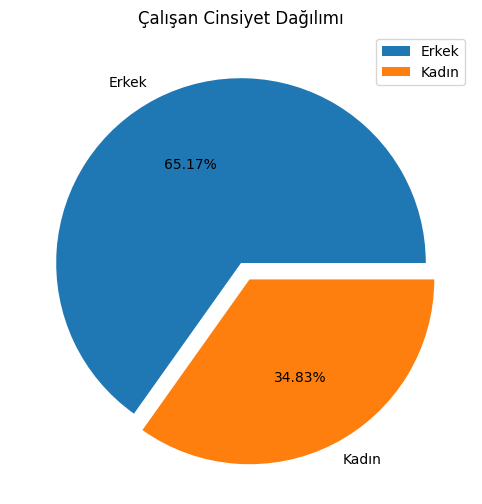

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(x=df['cinsiyet'].value_counts(), labels=df['cinsiyet'].value_counts().index, autopct="%1.2f%%", explode=[0, 0.1])
plt.title('Çalışan Cinsiyet Dağılımı')
plt.legend()

plt.show()

In [ ]:
df['calısma_süresi_yıl'].value_counts()

,count
calısma_süresi_yıl,
5,208
6,181
7,132
8,70
4,67
9,31


/tmp/ipython-input-3963698249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='calısma_süresi_yıl', data=df, palette='viridis')


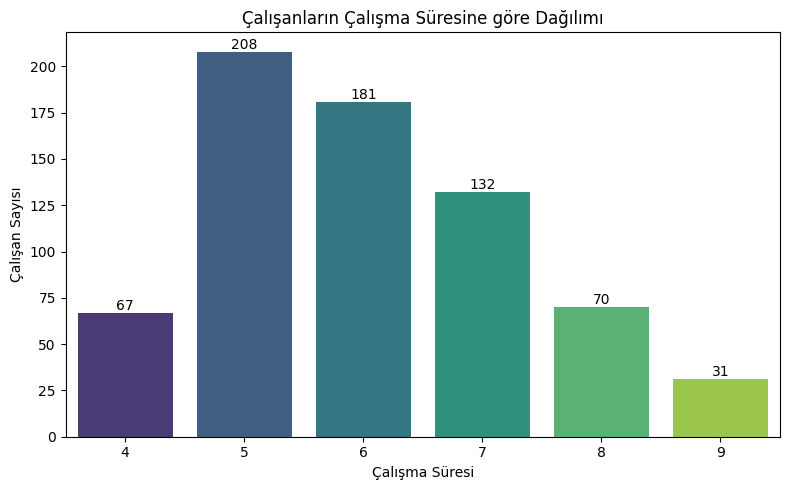

In [ ]:
#Employee distribution by Years of Service
count_per_Years = df.groupby('calısma_süresi_yıl').size().sort_values(ascending=False)
count_per_Years
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='calısma_süresi_yıl', data=df, palette='viridis')
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(str(count), (x, y), ha='center', va='bottom', fontsize=10)
plt.title("Çalışanların Çalışma Süresine göre Dağılımı")
plt.xlabel("Çalışma Süresi")
plt.ylabel("Çalışan Sayısı")
plt.tight_layout()
plt.show()

In [ ]:
df['departmanı'].value_counts()

,count
departmanı,
Üretim,140
Kalite Kontrol Uzmanı,89
Müşteri Yönetimi,84
Kalite Güvence,67
Tesis/Mühendislik,58
Pazarlama,48
Bilgi Teknolojileri,40
Ürün Geliştirme,34
Satış,20


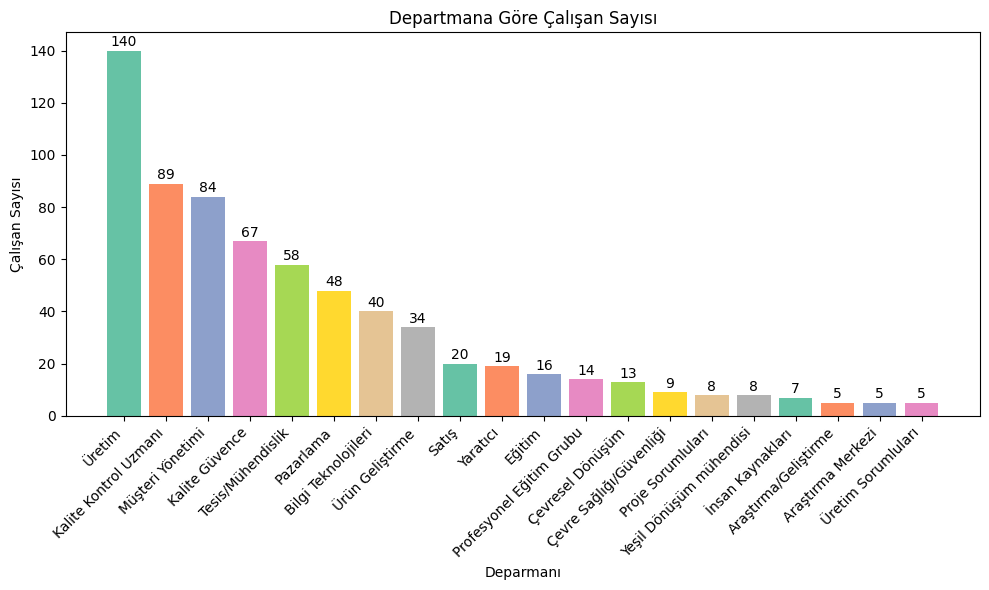

In [ ]:
#Employee distribution by Department
count_per_dept = df.groupby('departmanı').size().sort_values(ascending=False)
count_per_dept
colors = sns.color_palette('Set2', len(count_per_dept))

plt.figure(figsize=(10, 6))
bars = plt.bar(count_per_dept.index, count_per_dept.values, color=colors)

plt.title('Departmana Göre Çalışan Sayısı')
plt.xlabel('Deparmanı')
plt.ylabel('Çalışan Sayısı')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

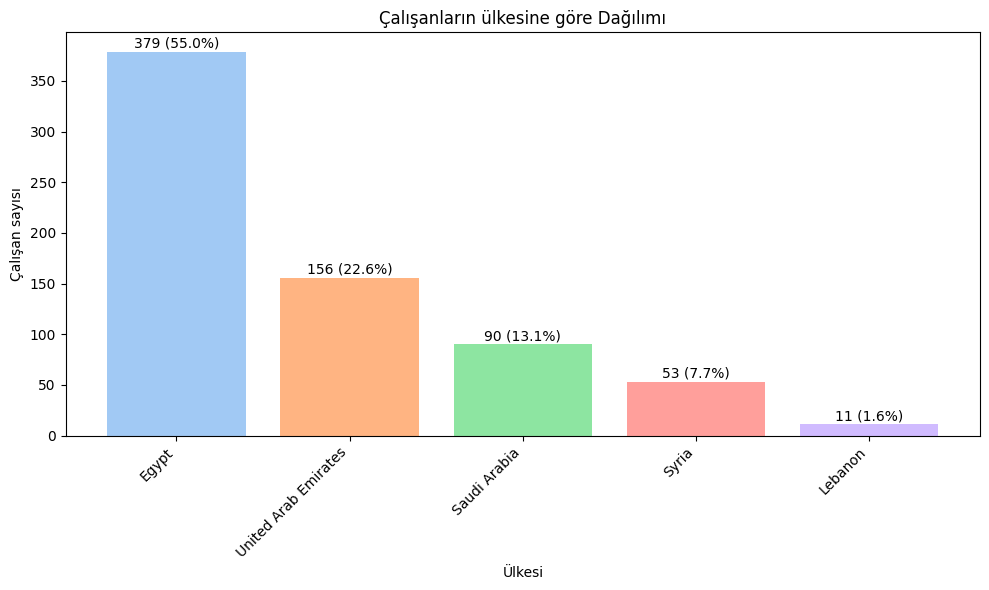

In [ ]:
#Employee distribution by Country
country_counts = df.groupby('ülkesi').size().sort_values(ascending=False)

colors = sns.color_palette("pastel", len(country_counts))
plt.figure(figsize=(10, 6))
bars = plt.bar(country_counts.index, country_counts.values, color=colors)
plt.title('Çalışanların ülkesine göre Dağılımı')
plt.xlabel('Ülkesi')
plt.ylabel('Çalışan sayısı')
plt.xticks(rotation=45, ha='right')
country_percent = country_counts / country_counts.sum() * 100
for bar, count, pct in zip(bars, country_counts.values, country_percent.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f"{count} ({pct:.1f}%)", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


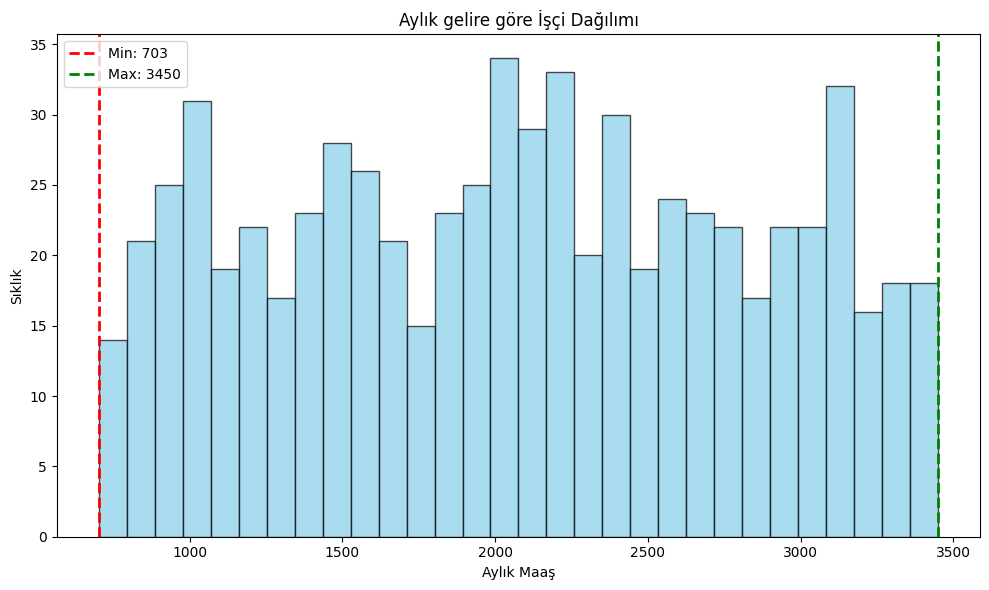

In [ ]:
#Employee distribution by Monthly salary
plt.figure(figsize=(10, 6))

plt.hist(df['aylık_maaş'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

min_salary = df['aylık_maaş'].min()
max_salary = df['aylık_maaş'].max()
plt.axvline(min_salary, color='red', linestyle='--', linewidth=2, label=f'Min: {min_salary}')
plt.axvline(max_salary, color='green', linestyle='--', linewidth=2, label=f'Max: {max_salary}')

plt.title('Aylık gelire göre İşçi Dağılımı')
plt.xlabel('Aylık Maaş')
plt.ylabel('Sıklık')
plt.legend()
plt.tight_layout()
plt.show()

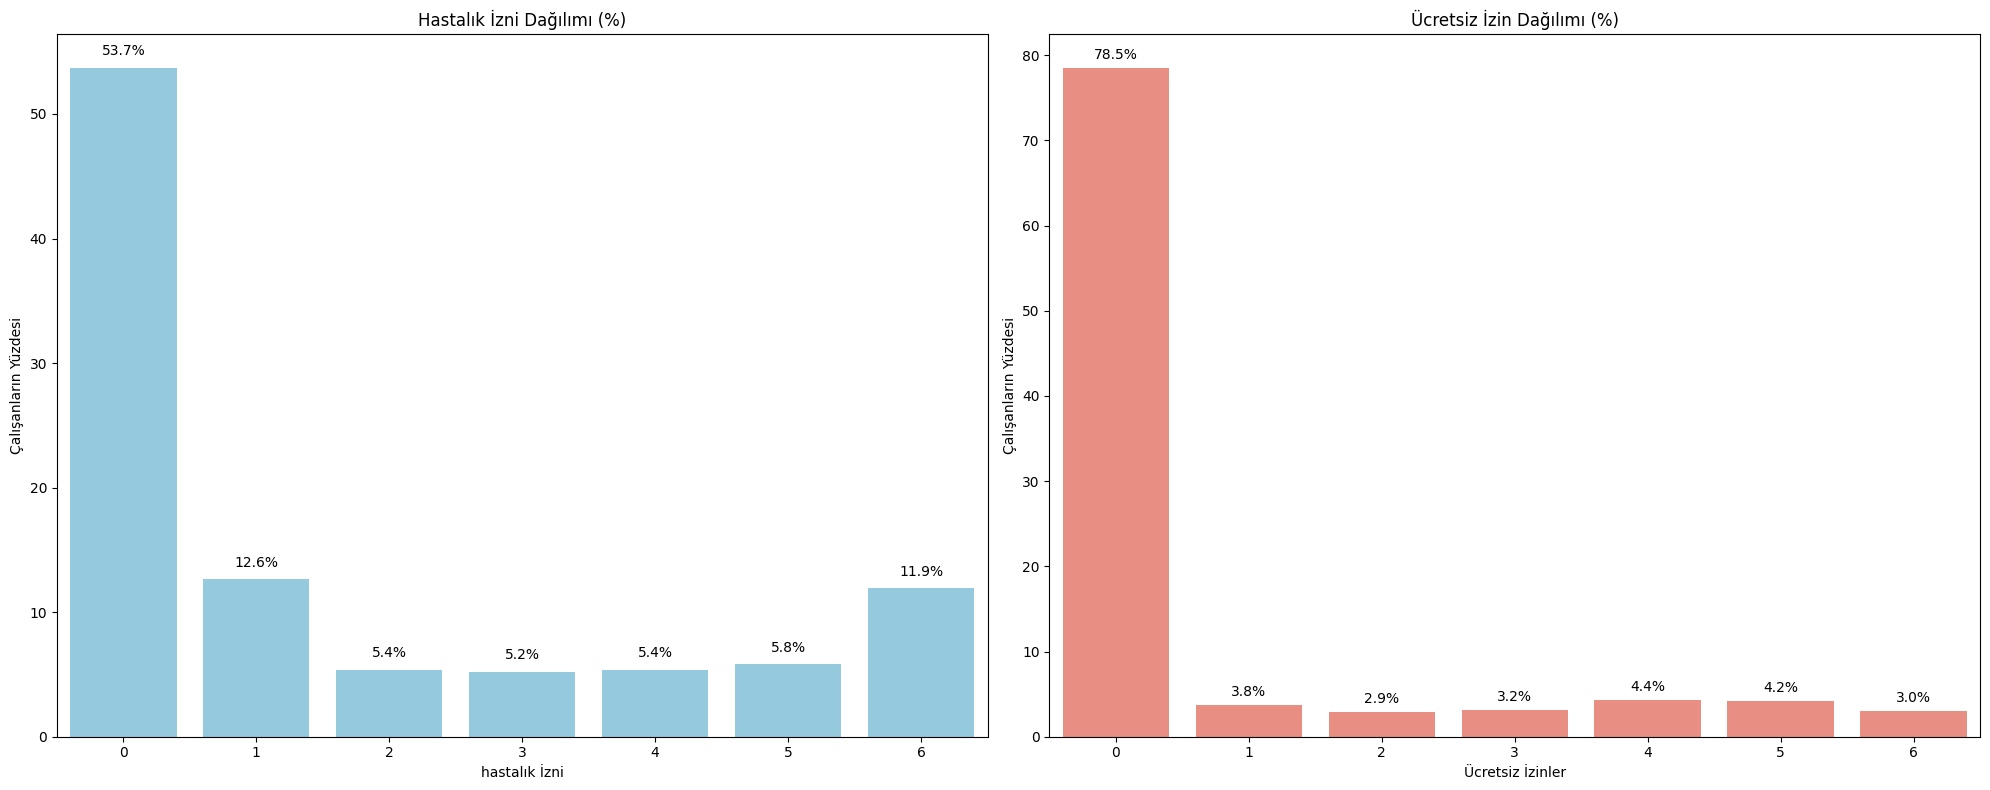

In [ ]:
#Employee distribution by Sick and unpaid leaves
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sick_counts = df['hastalık_izni'].value_counts(normalize=True).sort_index() * 100
sns.barplot(x=sick_counts.index, y=sick_counts.values, color='skyblue')
plt.title('Hastalık İzni Dağılımı (%)')
plt.xlabel('hastalık İzni')
plt.ylabel('Çalışanların Yüzdesi')

for i, value in enumerate(sick_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.subplot(1, 2, 2)
unpaid_counts = df['ücretsiz_izin'].value_counts(normalize=True).sort_index() * 100
sns.barplot(x=unpaid_counts.index, y=unpaid_counts.values, color='salmon')
plt.title('Ücretsiz İzin Dağılımı (%)')
plt.xlabel('Ücretsiz İzinler')
plt.ylabel('Çalışanların Yüzdesi')

for i, value in enumerate(unpaid_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

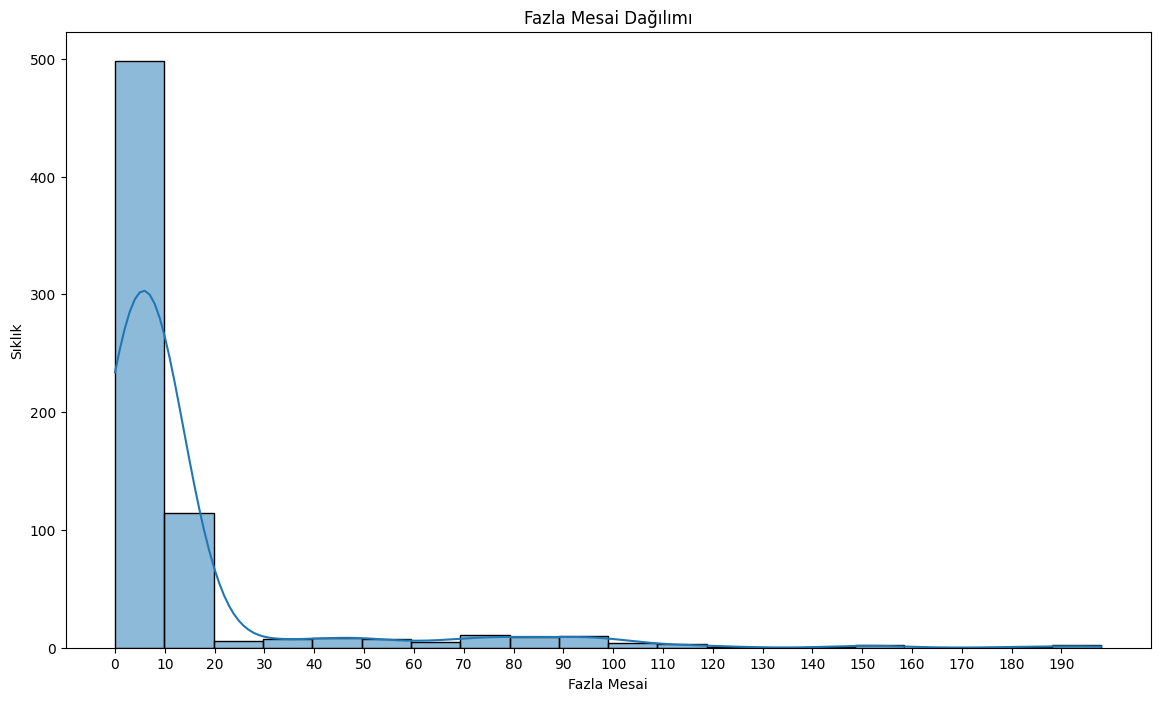

In [ ]:
#Employee distribution by Overtime Hours
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='fazla_mesai', bins=20, kde=True)
plt.title('Fazla Mesai Dağılımı')
plt.xlabel('Fazla Mesai')
plt.ylabel('Sıklık')
plt.xticks([i for i in range(0, 200, 10)])
plt.show()

/tmp/ipython-input-1048283910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='5_üzerinden_perfermansı', palette='inferno', data=df)


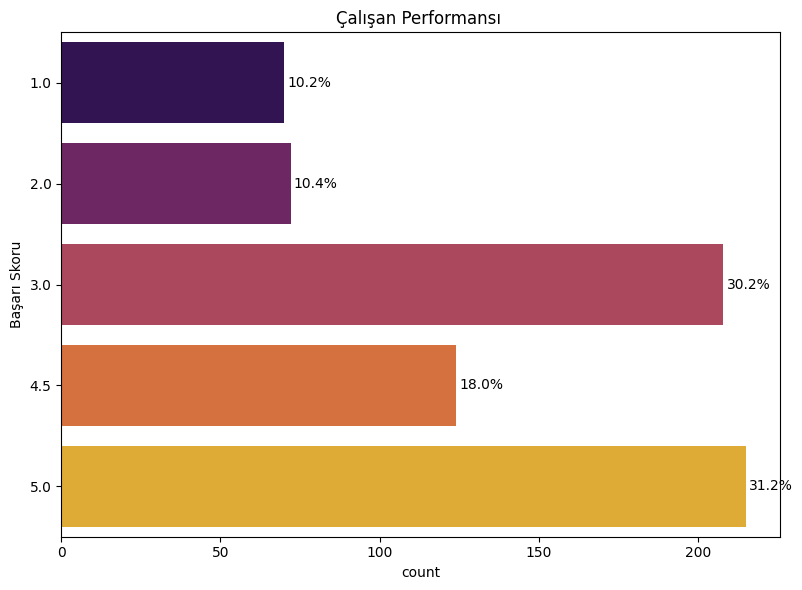

In [ ]:
#Employee distribution by Job rate
employee_counts2 = df.groupby('5_üzerinden_perfermansı').size().sort_values(ascending=False)
employee_counts2
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='5_üzerinden_perfermansı', palette='inferno', data=df)
plt.title('Çalışan Performansı ')
plt.ylabel('Başarı Skoru')
plt.tight_layout()

for p in ax.patches:
    center = p.get_y() + p.get_height() / 2
    count = p.get_width()
    percent = (count / len(df)) * 100
    ax.text(count + 1, center, f"{percent:.1f}%", va='center')

plt.show()

/tmp/ipython-input-628770495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_Years, x='departmanı', y='calısma_süresi_yıl', palette='coolwarm')


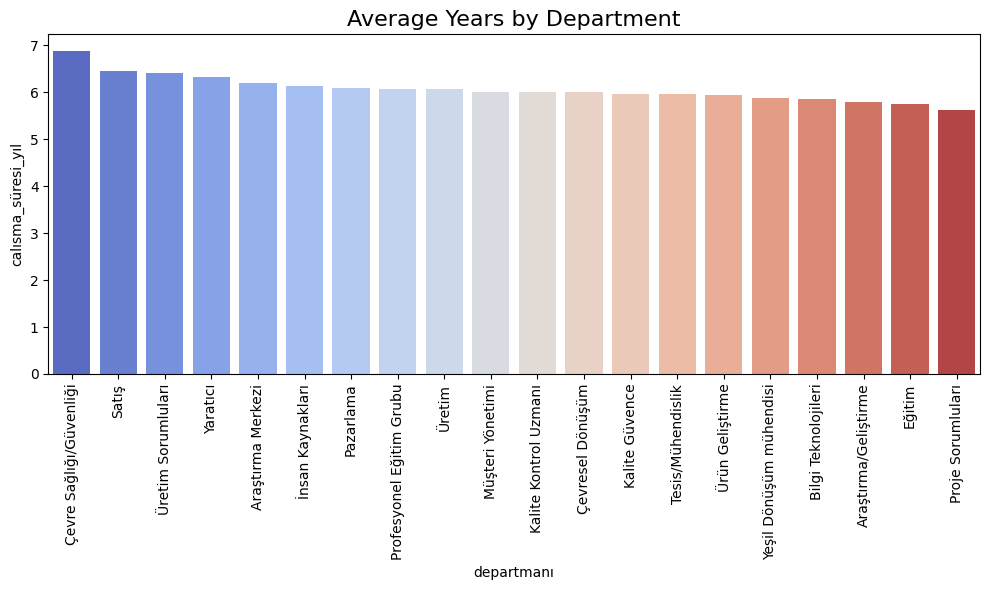

In [ ]:
#Ave Years of service by Department
avg_Years = df.groupby('departmanı')['calısma_süresi_yıl'].mean().reset_index().sort_values(by='calısma_süresi_yıl', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=avg_Years, x='departmanı', y='calısma_süresi_yıl', palette='coolwarm')

plt.title('Departmanına GÖre Ortalama Yılı', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-939066764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_Country, x='ülkesi', y='calısma_süresi_yıl', palette='coolwarm')


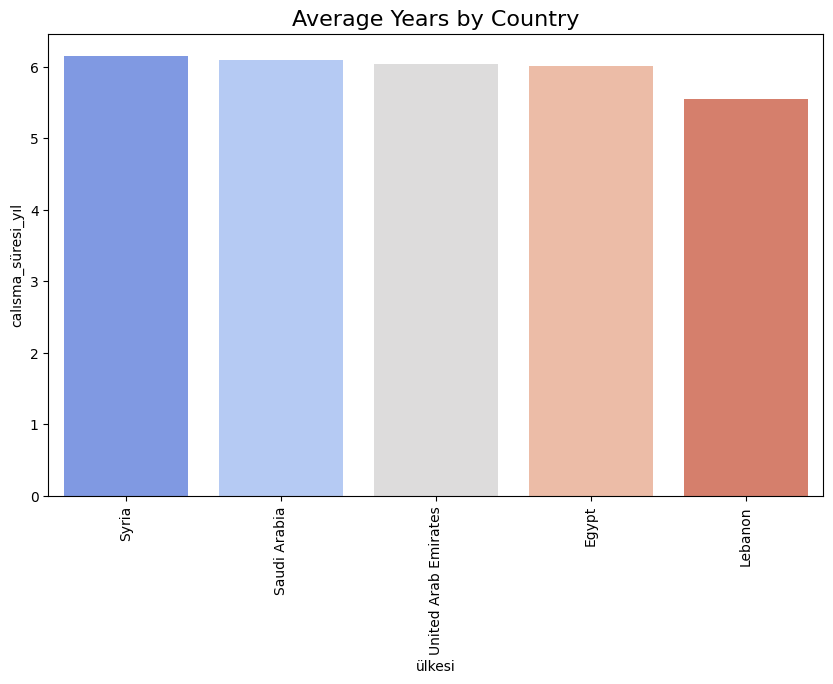

In [ ]:
#Ave Years of service by Country
avg_Country = df.groupby('ülkesi')['calısma_süresi_yıl'].mean().reset_index().sort_values(by='calısma_süresi_yıl', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_Country, x='ülkesi', y='calısma_süresi_yıl', palette='coolwarm')

plt.title('Average Years by Country', fontsize=16)
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-3009441376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_Gender, x='cinsiyet', y='calısma_süresi_yıl', palette='viridis')


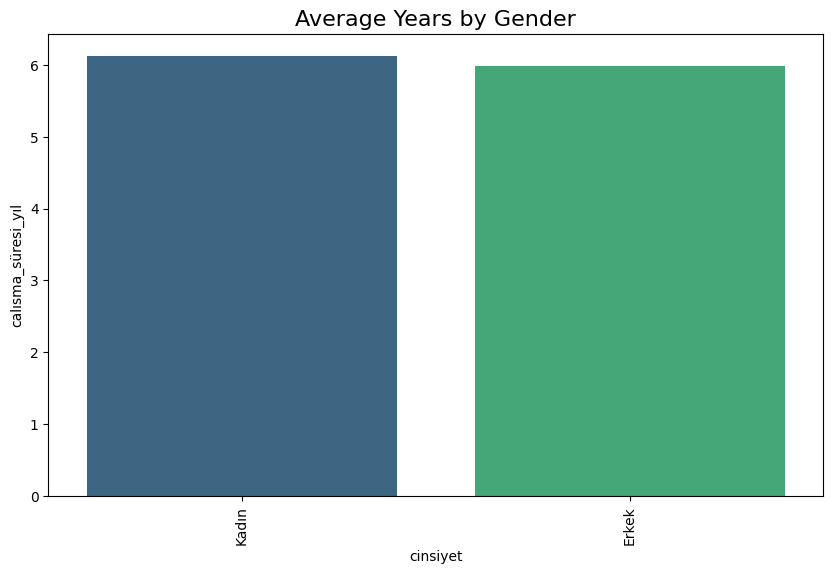

In [ ]:
#Ave Years of service by Gender

avg_Gender = df.groupby('cinsiyet')['calısma_süresi_yıl'].mean().reset_index().sort_values(by='calısma_süresi_yıl', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_Gender, x='cinsiyet', y='calısma_süresi_yıl', palette='viridis')

plt.title('Average Years by Gender', fontsize=16)
plt.xticks(rotation=90)
plt.show()


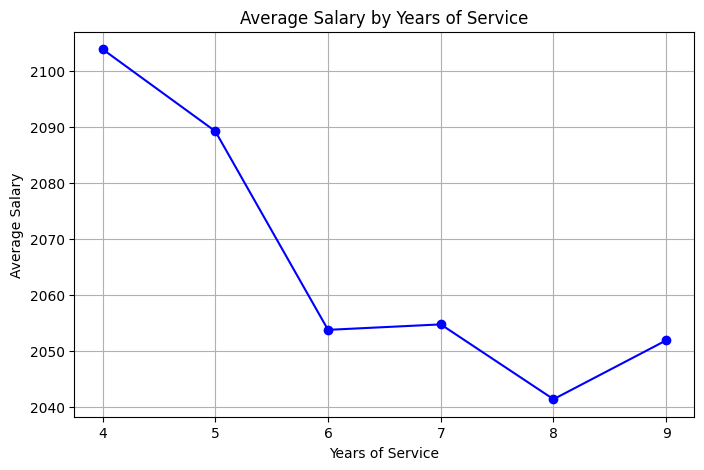

In [ ]:
# Ave salary by Years
avg_salary_by_years = df.groupby('calısma_süresi_yıl')['aylık_maaş'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_salary_by_years['calısma_süresi_yıl'], avg_salary_by_years['aylık_maaş'], marker='o', color='blue')
plt.title('Average Salary by Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

In [ ]:
correlation = df['calısma_süresi_yıl'].corr(df['aylık_maaş'])
print(f'Correlation between Years and Salary: {correlation:.2f}')

Correlation between Years and Salary: -0.02


/tmp/ipython-input-4156585643.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='departmanı', y='aylık_maaş', data=avg_salary_by_dept, palette='viridis')


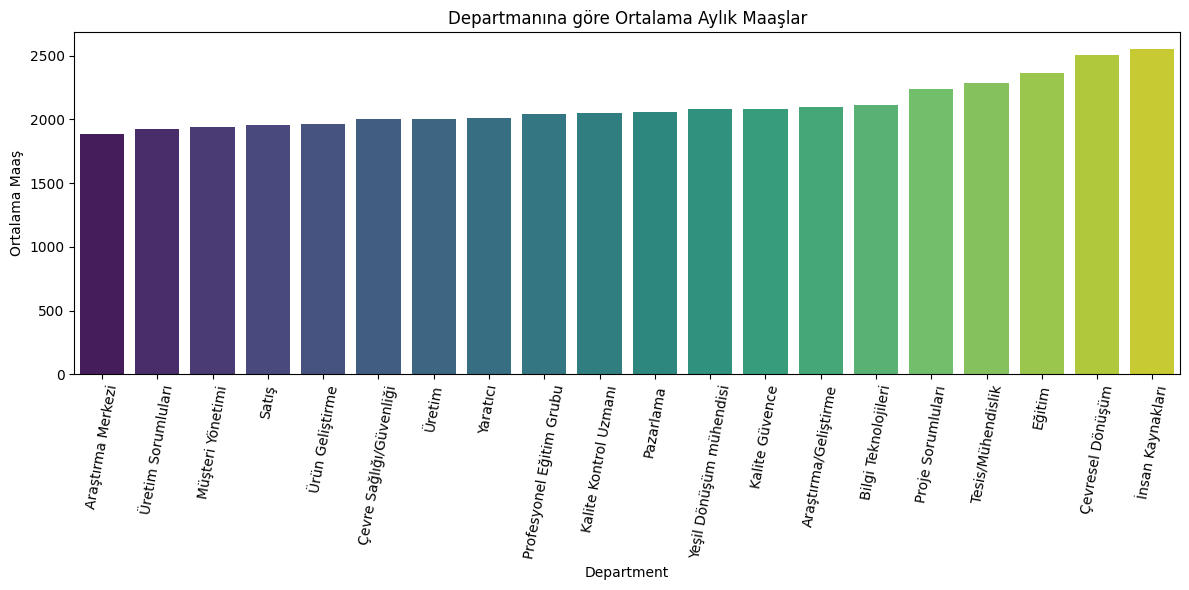

In [ ]:
#Ave salary by dep
avg_salary_by_dept = df.groupby('departmanı')['aylık_maaş'].mean().reset_index()
avg_salary_by_dept = avg_salary_by_dept.sort_values(by='aylık_maaş')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='departmanı', y='aylık_maaş', data=avg_salary_by_dept, palette='viridis')
plt.xticks(rotation=80)
plt.title("Departmanına göre Ortalama Aylık Maaşlar")
plt.ylabel("Ortalama Maaş")
plt.xlabel("Department")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1982393891.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ülkesi', y='aylık_maaş', data=df, order=order, ci=None)


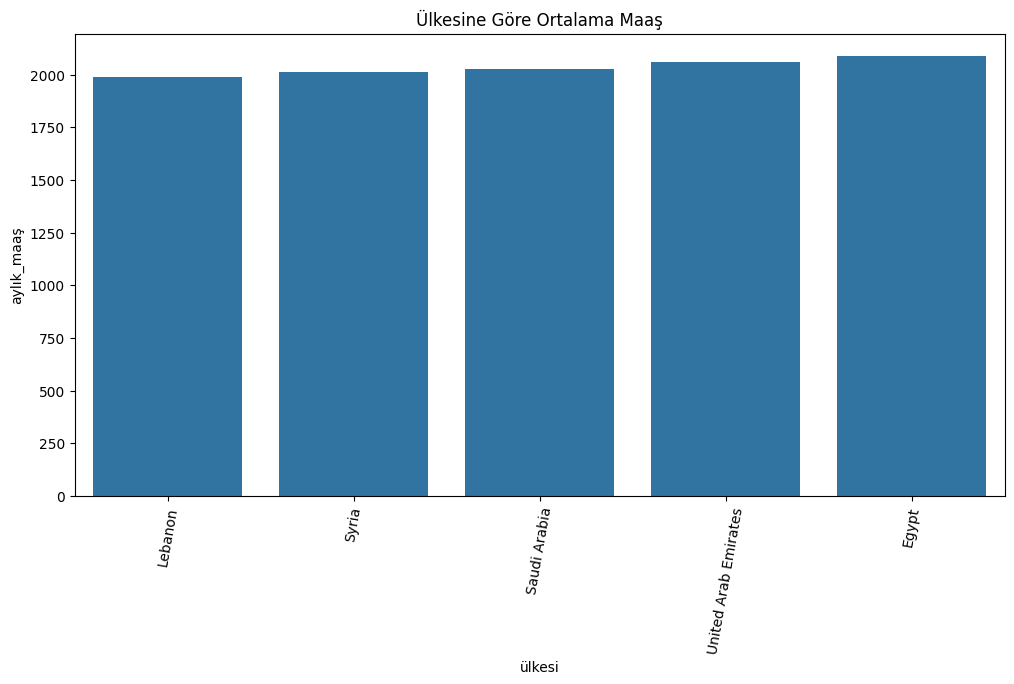

In [ ]:
# Ave salary by country
order = df.groupby('ülkesi')['aylık_maaş'].mean().sort_values().index

plt.figure(figsize=(12, 6))
sns.barplot(x='ülkesi', y='aylık_maaş', data=df, order=order, ci=None)
plt.xticks(rotation=80)
plt.title("Ülkesine Göre Ortalama Maaş")
plt.show()

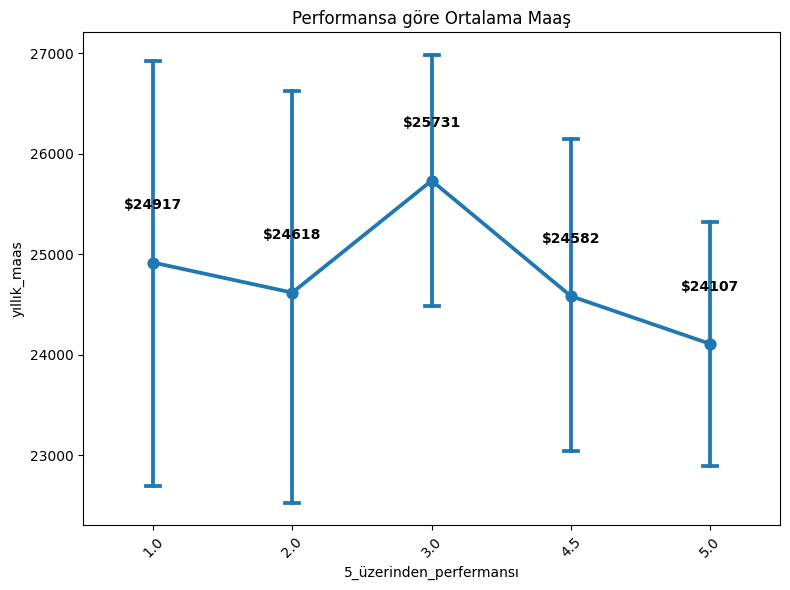

In [ ]:
#Ave salary by Job Rate
plt.figure(figsize=(8, 6))

mean_salaries = df.groupby('5_üzerinden_perfermansı')['yıllık_maas'].mean().reset_index()
ax = sns.pointplot(x='5_üzerinden_perfermansı', y='yıllık_maas', data=df, capsize=0.1)

plt.title('Performansa göre Ortalama Maaş')
plt.xlabel('5_üzerinden_perfermansı')
plt.ylabel('yıllık_maas')
plt.xticks(rotation=45)
plt.tight_layout()
for i, row in mean_salaries.iterrows():
    ax.text(i, row['yıllık_maas'] + 500,
            f"${row['yıllık_maas']:.0f}",
            ha='center', va='bottom', fontweight='bold')

plt.show()


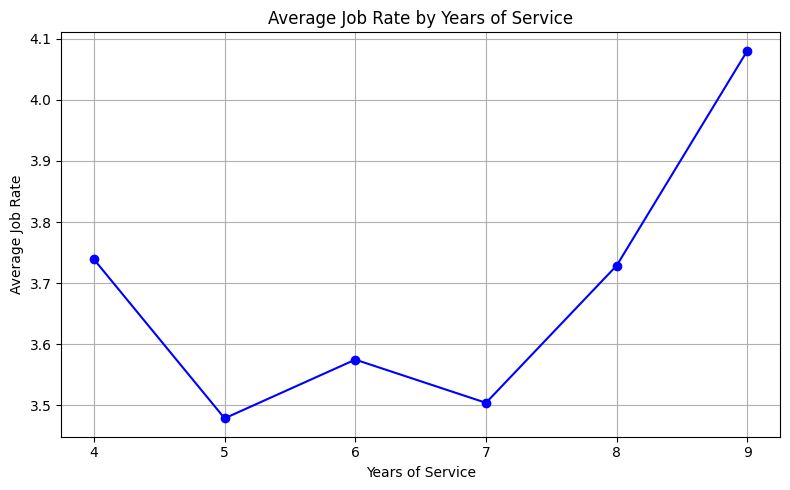

In [ ]:
#Ave Job Rate by Years
avg_Job_Rate = df.groupby('calısma_süresi_yıl')['5_üzerinden_perfermansı'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(avg_Job_Rate['calısma_süresi_yıl'], avg_Job_Rate['5_üzerinden_perfermansı'], marker='o', color='blue')
plt.title('Average Job Rate by Years of Service')
plt.xlabel('Years of Service')
plt.ylabel('Average Job Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
correlation = df['calısma_süresi_yıl'].corr(df['5_üzerinden_perfermansı'])
print(f'Correlation between Years of Service and Job Performance Rating: {correlation:.2f}')

Correlation between Years of Service and Job Performance Rating: 0.05


/tmp/ipython-input-1252484895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_job_rate, x='departmanı', y='5_üzerinden_perfermansı', palette='coolwarm')


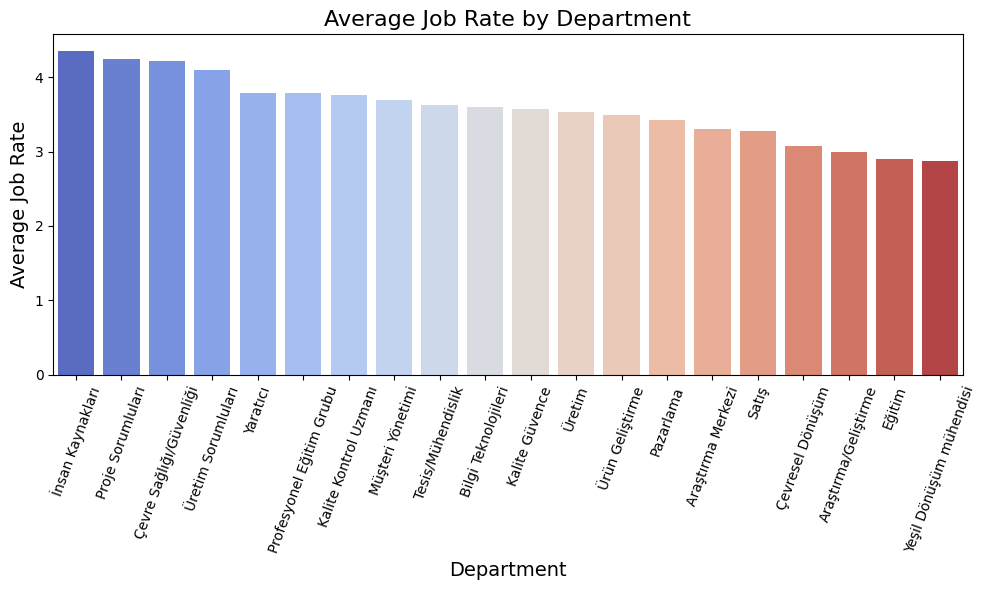

In [ ]:
#Ave Job Rate by Department

avg_job_rate = df.groupby('departmanı')['5_üzerinden_perfermansı'].mean().reset_index().sort_values(by='5_üzerinden_perfermansı', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=avg_job_rate, x='departmanı', y='5_üzerinden_perfermansı', palette='coolwarm')

plt.title('Average Job Rate by Department', fontsize=16)
plt.ylabel('Average Job Rate', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2467521173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_job_rate_country, x='ülkesi', y='5_üzerinden_perfermansı', palette='magma')


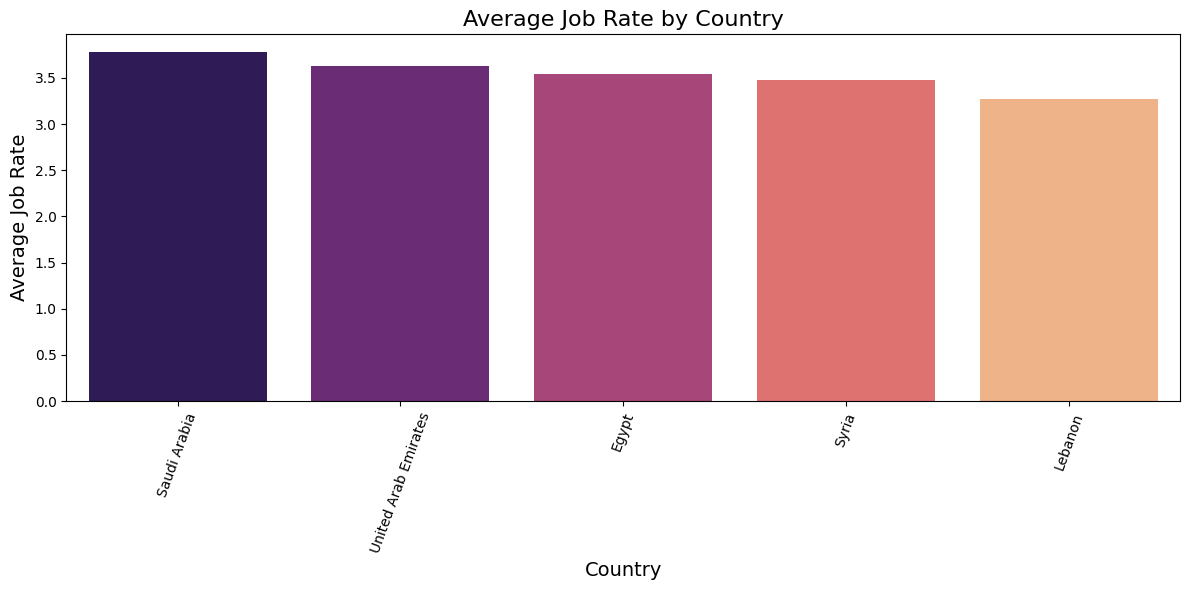

In [ ]:
# Ave Job Rate by Country
avg_job_rate_country = df.groupby('ülkesi')['5_üzerinden_perfermansı'].mean().reset_index().sort_values(by='5_üzerinden_perfermansı', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=avg_job_rate_country, x='ülkesi', y='5_üzerinden_perfermansı', palette='magma')

plt.title('Ülkesine Göre İş Skoru', fontsize=16)
plt.xlabel('Ülkesi', fontsize=14)
plt.ylabel('Ort. Skoru', fontsize=14)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

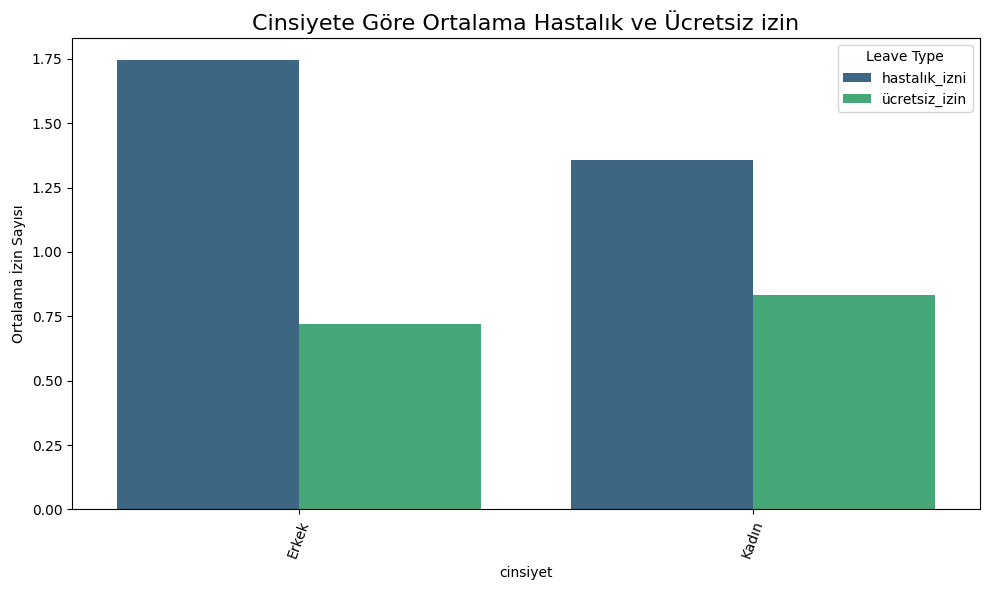

In [ ]:
#Sick and unpaid leaves by Gender

avg_leaves = df.groupby('cinsiyet')[['hastalık_izni', 'ücretsiz_izin']].mean().reset_index()

avg_leaves_melted = avg_leaves.melt(id_vars='cinsiyet',
                                     value_vars=['hastalık_izni', 'ücretsiz_izin'],
                                     var_name='Leave Type',
                                     value_name='Average Leaves')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_leaves_melted, x='cinsiyet', y='Average Leaves', hue='Leave Type', palette='viridis')

plt.title('Cinsiyete Göre Ortalama Hastalık ve Ücretsiz izin', fontsize=16)
plt.xticks(rotation=70)
plt.ylabel('Ortalama İzin Sayısı')
plt.xlabel('cinsiyet')
plt.legend(title='Leave Type')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,isim,soyisim,cinsiyet,ise_başlama_tar,calısma_süresi_yıl,departmanı,ülkesi,aylık_maaş,yıllık_maas,5_üzerinden_perfermansı,hastalık_izni,ücretsiz_izin,fazla_mesai
0,Ghadir,Hmshw,Erkek,2018-04-04,7,Kalite Kontrol Uzmanı,Egypt,1560,18720,3.0,1,0,183
1,Omar,Hishan,Erkek,2020-05-21,5,Kalite Kontrol Uzmanı,Saudi Arabia,3247,38964,1.0,0,5,198
2,Ailya,Sharaf,Kadın,2017-09-28,7,Proje Sorumluları,Saudi Arabia,2506,30072,2.0,0,3,192
3,Lwiy,Qbany,Erkek,2018-08-14,6,Üretim,United Arab Emirates,1828,21936,3.0,0,0,7
4,Ahmad,Bikri,Erkek,2020-03-11,5,Üretim,Egypt,970,11640,5.0,0,5,121


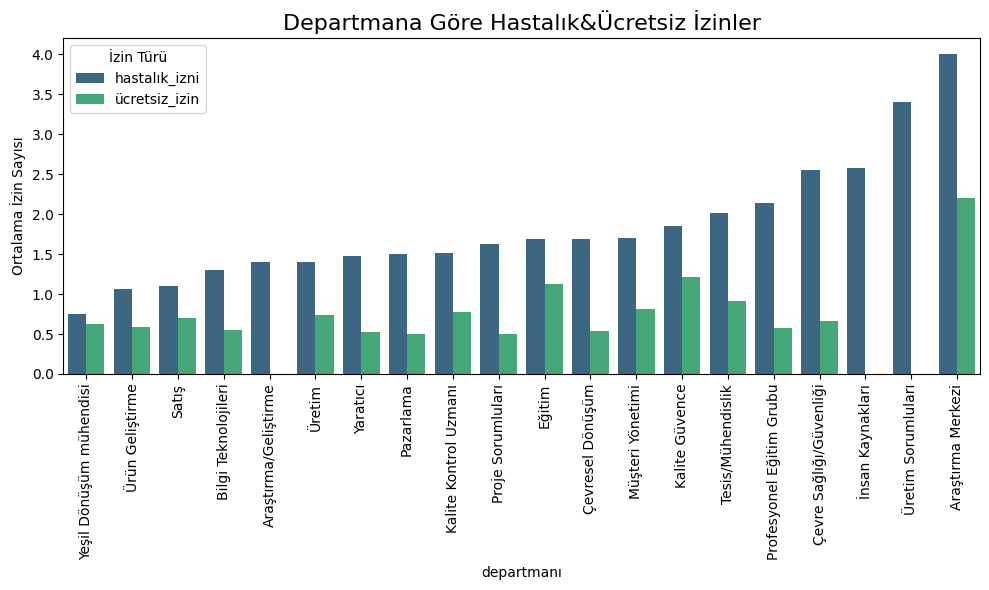

In [ ]:
#Sick and unpaid leaves by Department
avg_leaves = df.groupby('departmanı')[['hastalık_izni', 'ücretsiz_izin']].mean().reset_index()
avg_leaves = avg_leaves.sort_values(by=['hastalık_izni', 'ücretsiz_izin'], ascending=[True, True])

avg_leaves_melted = avg_leaves.melt(id_vars='departmanı',
                                     value_vars=['hastalık_izni', 'ücretsiz_izin'],
                                     var_name='Leave Type',
                                     value_name='Average Leaves')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_leaves_melted, x='departmanı', y='Average Leaves', hue='Leave Type', palette='viridis')

plt.title('Departmana Göre Hastalık&Ücretsiz İzinler', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Ortalama İzin Sayısı')
plt.xlabel('departmanı')
plt.legend(title='İzin Türü')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3165802403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_Overtimehours_by_Department, x='departmanı', y='fazla_mesai', palette='Set2')


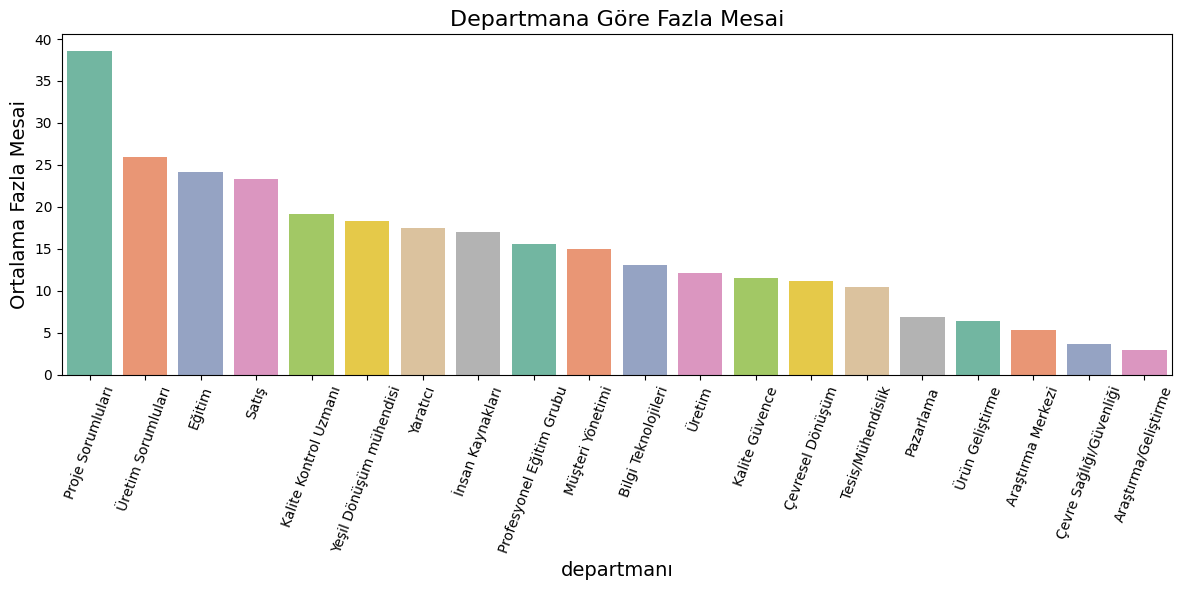

In [ ]:
#Overtime hours by Department

avg_Overtimehours_by_Department = df.groupby('departmanı')['fazla_mesai'].mean().reset_index().sort_values(by='fazla_mesai', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=avg_Overtimehours_by_Department, x='departmanı', y='fazla_mesai', palette='Set2')

plt.title('Departmana Göre Fazla Mesai', fontsize=16)
plt.xlabel('departmanı', fontsize=14)
plt.ylabel('Ortalama Fazla Mesai', fontsize=14)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

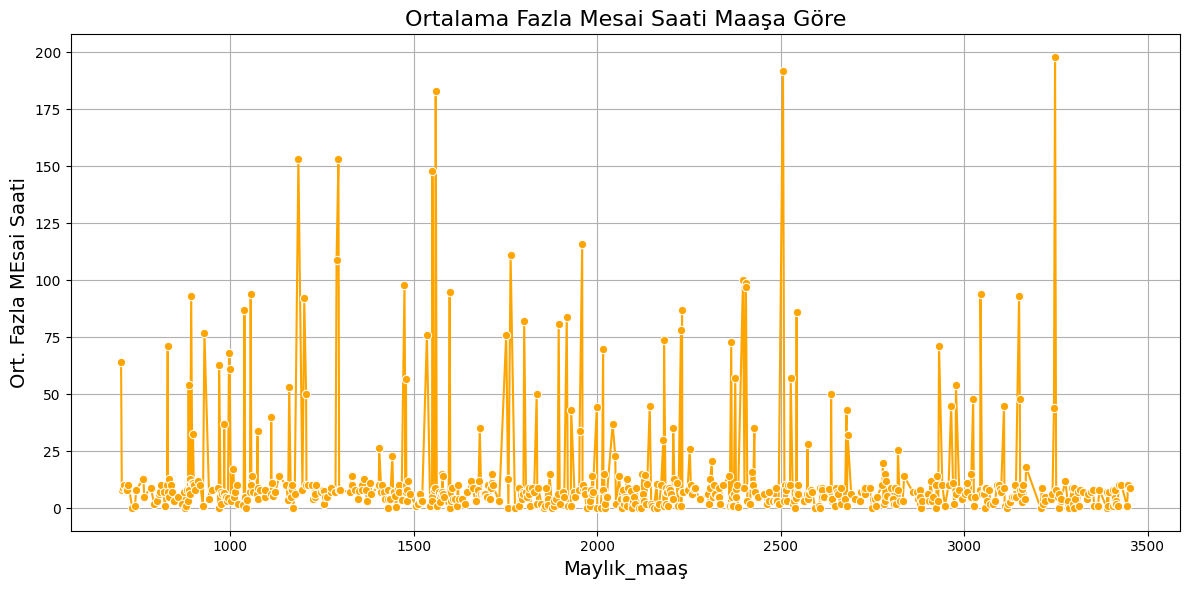

In [ ]:
#Overtime hours by Monthly Salary
avg_Overtimehours_by_S = df.groupby('aylık_maaş')['fazla_mesai'].mean().reset_index().sort_values(by='aylık_maaş')

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_Overtimehours_by_S, x='aylık_maaş', y='fazla_mesai', marker='o', color='orange')
plt.title('Ortalama Fazla Mesai Saati Maaşa Göre', fontsize=16)
plt.xlabel('Maylık_maaş', fontsize=14)
plt.ylabel('Ort. Fazla MEsai Saati', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,isim,soyisim,cinsiyet,ise_başlama_tar,calısma_süresi_yıl,departmanı,ülkesi,aylık_maaş,yıllık_maas,5_üzerinden_perfermansı,hastalık_izni,ücretsiz_izin,fazla_mesai
0,Ghadir,Hmshw,Erkek,2018-04-04,7,Kalite Kontrol Uzmanı,Egypt,1560,18720,3.0,1,0,183
1,Omar,Hishan,Erkek,2020-05-21,5,Kalite Kontrol Uzmanı,Saudi Arabia,3247,38964,1.0,0,5,198
2,Ailya,Sharaf,Kadın,2017-09-28,7,Proje Sorumluları,Saudi Arabia,2506,30072,2.0,0,3,192
3,Lwiy,Qbany,Erkek,2018-08-14,6,Üretim,United Arab Emirates,1828,21936,3.0,0,0,7
4,Ahmad,Bikri,Erkek,2020-03-11,5,Üretim,Egypt,970,11640,5.0,0,5,121


/tmp/ipython-input-1345602088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_Overtimehours_by_J, x='5_üzerinden_perfermansı', y='fazla_mesai', palette='magma')


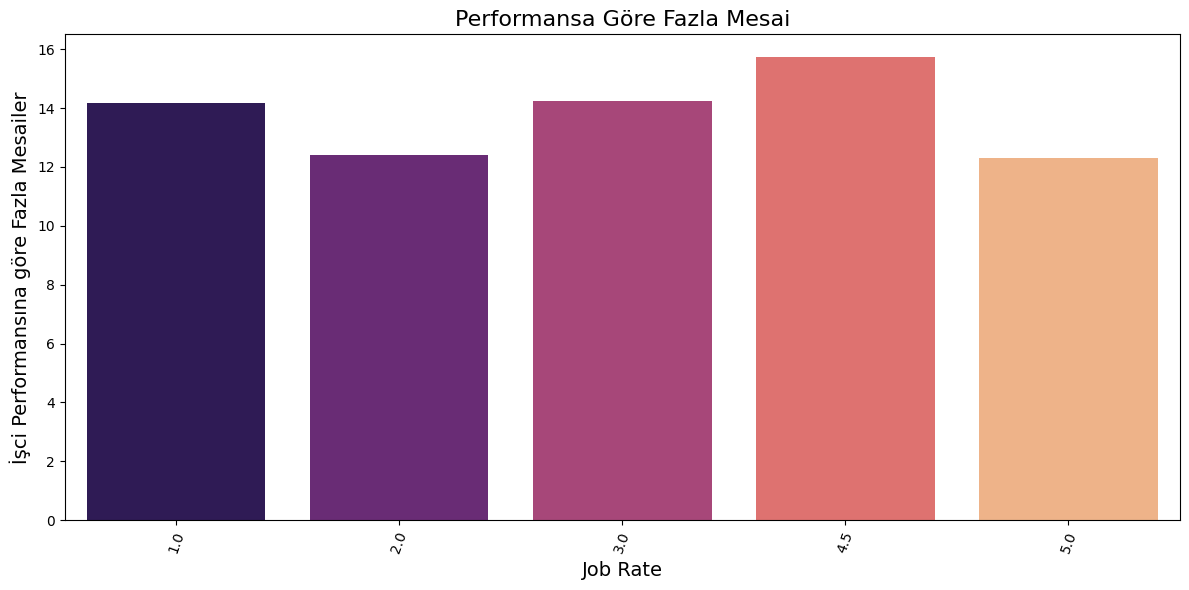

In [ ]:
#Overtime hours by Job Rate

avg_Overtimehours_by_J = df.groupby('5_üzerinden_perfermansı')['fazla_mesai'].mean().reset_index().sort_values(by='fazla_mesai', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=avg_Overtimehours_by_J, x='5_üzerinden_perfermansı', y='fazla_mesai', palette='magma')

plt.title('Performansa Göre Fazla Mesai', fontsize=16)
plt.xlabel('5 üzerinden Performansı', fontsize=14)
plt.ylabel('İşci Performansına göre Fazla Mesailer', fontsize=14)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [ ]:
correlation = df['fazla_mesai'].corr(df['5_üzerinden_perfermansı'])
print(f'Correlation between Years of Service and Job Performance Rating: {correlation:.2f}')

Correlation between Years of Service and Job Performance Rating: -0.01
